In [1]:
from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils.sulfur.constant as const

from scipy.stats import ttest_ind, wilcoxon

In [2]:
def means_of_sum_correlation(context_name, start, end):
    column_values = [['engram cells', 'engram cells', 'non-engram cells', 'non-engram cells'], 
                      ['positive', 'negative', 'positive', 'negative']]
    columns = pd.MultiIndex.from_tuples(list(zip(*column_values)))
    df = pd.DataFrame(0.0, columns=columns, index=const.ANIMAL_NAMES)
    for animal_name in const.ANIMAL_NAMES:
        calculator = TimeCorrelationCalculator(animal_name, context_name)
        
        engram_df, non_engram_df = calculator.calc(start=start, end=end)
        
        df.loc[animal_name, ('engram cells', 'positive')]     = engram_df[engram_df > 0.0].count().mean() / len(engram_df) * 100
        df.loc[animal_name, ('non-engram cells', 'positive')] = non_engram_df[non_engram_df > 0.0].count().mean() / len(engram_df) * 100
        
        df.loc[animal_name, ('engram cells', 'negative')]     = engram_df[engram_df < 0.0].count().mean() / len(engram_df) * 100
        df.loc[animal_name, ('non-engram cells', 'negative')] = non_engram_df[non_engram_df < 0.0].count().mean() / len(engram_df) * 100
        
    print(df)
    return df

In [3]:
def ratio_of_sum_correlation(df, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    
    means = df.mean()
    errors = df.sem()
    x = np.arange(0, 1.6, 1.5)
    ax.bar(x=0.0, height=means['non-engram cells'], label='non-engram cells', yerr=errors['non-engram cells'], capsize=2, align='center', color='green')
    ax.bar(x=1.5, height=means['engram cells'], label='engram cells', yerr=errors['engram cells'], capsize=2, align='center', color='orange')
    #ax.bar(x=3.0, height=means['shuffle cells'], label='shuffle cells', yerr=errors['shuffle cells'], capsize=2, align='center', color='royalblue')
    ax.set_xticks(x)
    ax.set_xticklabels(labels=['non-engram cells', 'engram cells'], fontsize=20)
    ax.set_ylabel('ratio of positive sum all correlation', fontsize=20)
    
    for index, row in df.iterrows():
        engram_value = row[0]
        non_engram_value = row[1]
        ax.plot(np.array([0.5, 1.0]), np.array([non_engram_value, engram_value]), marker='x', color='grey')
        #ax.plot(np.array([2.0, 2.5]), np.array([engram_value, shuffle_value]), marker='x', color='grey')
    fig.show()

In [4]:
df_per_context = {}

             engram cells          non-engram cells         
                 positive negative         positive negative
ID181106CreA       43.750   56.250           92.875    7.125
ID181106CreB       42.375   57.625           85.625   14.375
ID181106CreC       47.500   52.500           80.875   19.125
ID181106CreG       56.125   43.875           99.125    0.875
ID181106CreH       56.750   43.250           91.500    8.500
ID181106CreI       60.750   39.250           84.875   15.125
ID181106CreK       60.250   39.750           97.250    2.750
ID181106CreL       53.500   46.500           94.375    5.625
ID181106CreN       45.375   54.625           91.875    8.125
ID181106CreQ       47.750   52.250           91.875    8.125


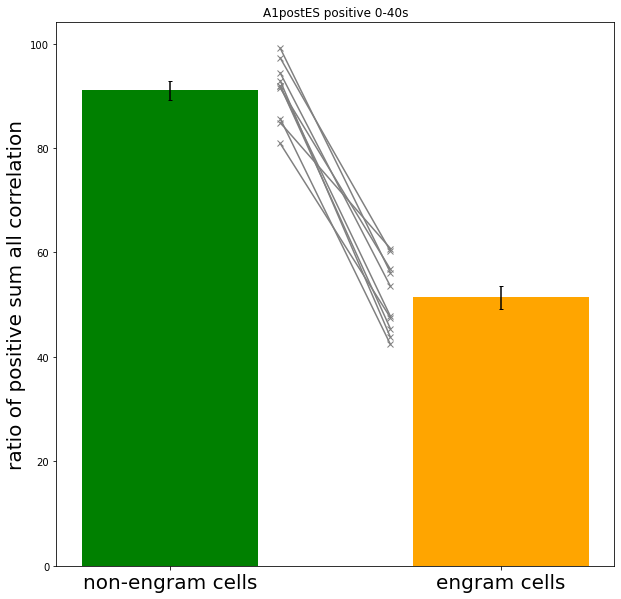

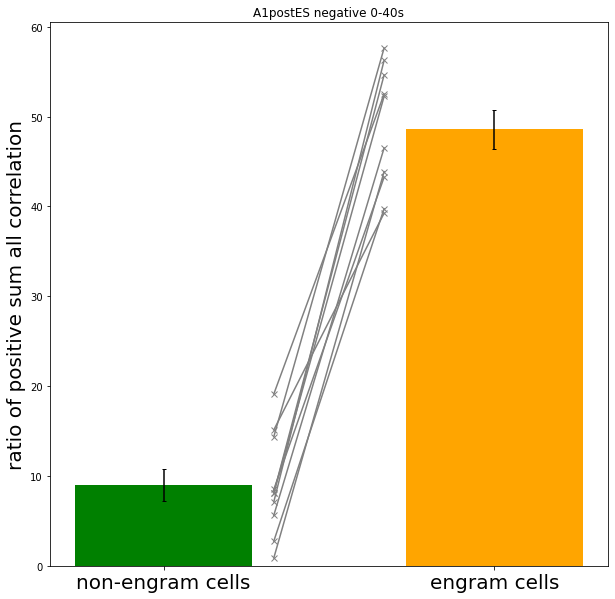

In [5]:
df = means_of_sum_correlation('A1postES', 0, 40)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1postES positive 0-40s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1postES negative 0-40s')
df_per_context['A1postES_0-40'] = df

             engram cells          non-engram cells         
                 positive negative         positive negative
ID181106CreA       56.125   43.875           95.250    4.750
ID181106CreB       47.625   52.375           77.875   22.125
ID181106CreC       46.500   53.500           79.375   20.625
ID181106CreG       52.375   47.625           87.750   12.250
ID181106CreH       50.125   49.875           89.625   10.375
ID181106CreI       75.250   24.750           92.000    8.000
ID181106CreK       53.125   46.875           99.875    0.125
ID181106CreL       47.000   53.000           87.500   12.500
ID181106CreN       43.625   56.375           96.625    3.375
ID181106CreQ       44.750   55.250           87.500   12.500


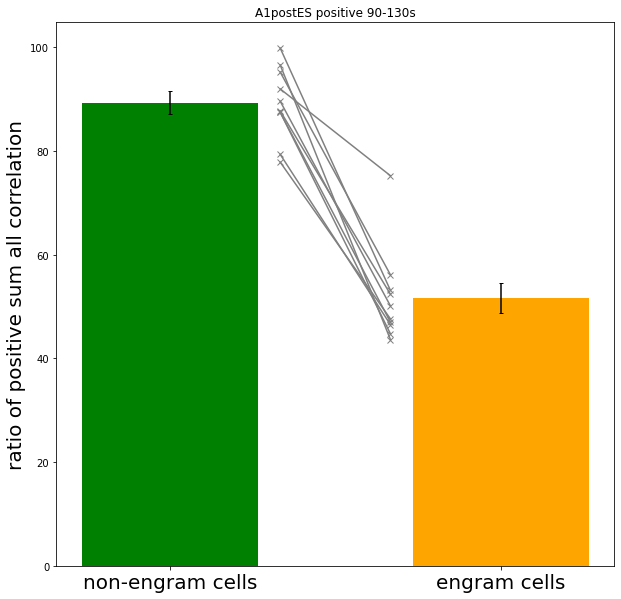

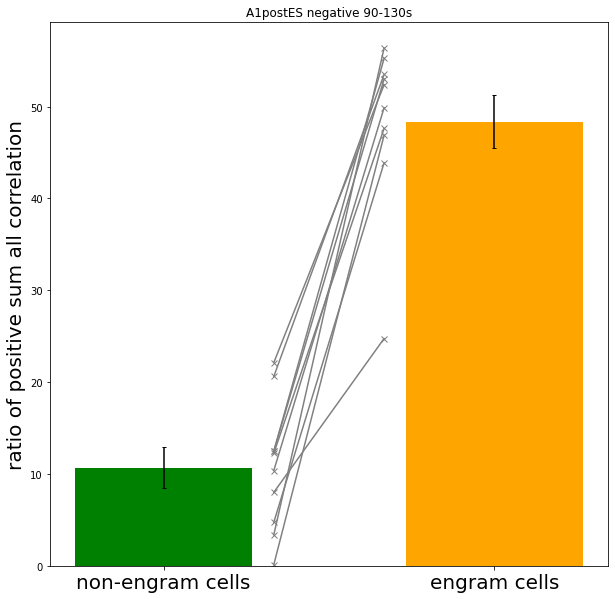

In [6]:
df = means_of_sum_correlation('A1postES', 90, 130)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1postES positive 90-130s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1postES negative 90-130s')
df_per_context['A1postES_90-130'] = df

             engram cells          non-engram cells         
                 positive negative         positive negative
ID181106CreA       59.500   40.500           94.375    5.625
ID181106CreB       49.375   50.625           80.000   20.000
ID181106CreC       54.125   45.875           83.375   16.625
ID181106CreG       50.250   49.750           87.750   12.250
ID181106CreH       54.750   45.250           90.250    9.750
ID181106CreI       55.500   44.500           88.875   11.125
ID181106CreK       46.250   53.750           98.250    1.750
ID181106CreL       42.500   57.500           83.000   17.000
ID181106CreN       50.500   49.500           98.625    1.375
ID181106CreQ       42.500   57.500           85.750   14.250


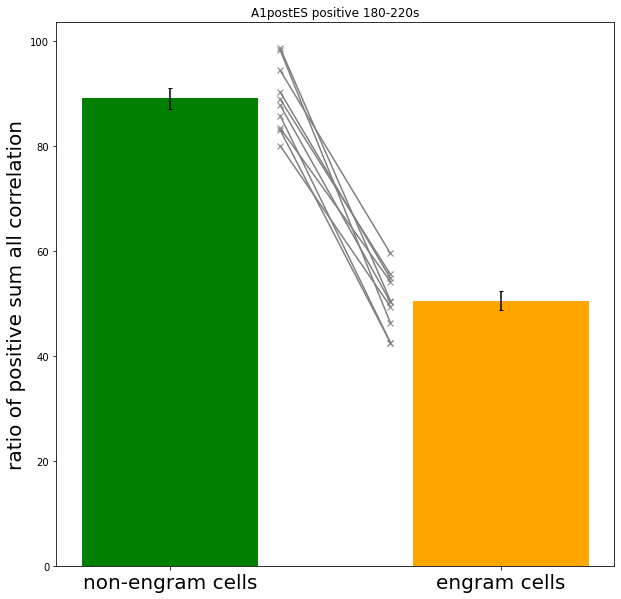

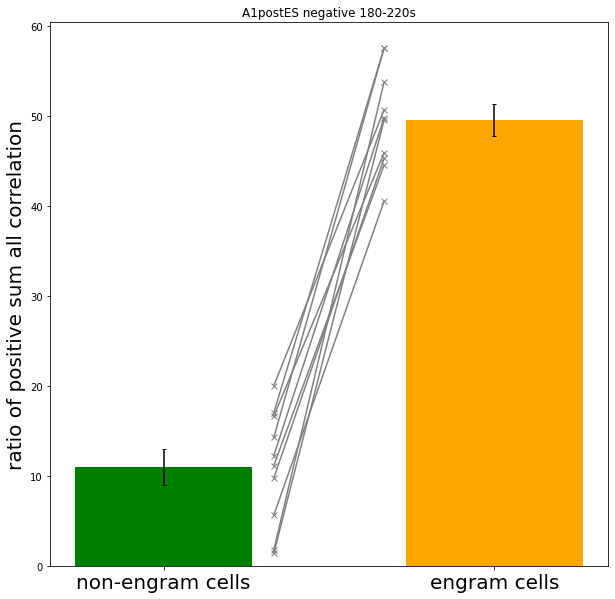

In [7]:
df = means_of_sum_correlation('A1postES', 180, 220)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1postES positive 180-220s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1postES negative 180-220s')
df_per_context['A1postES_180-220'] = df

             engram cells          non-engram cells         
                 positive negative         positive negative
ID181106CreA       49.250   50.750           86.750   13.250
ID181106CreB       46.750   53.250           82.750   17.250
ID181106CreC       50.500   49.500           83.750   16.250
ID181106CreG       47.000   53.000           94.250    5.750
ID181106CreH       53.750   46.250           86.250   13.750
ID181106CreI       61.875   38.125           81.625   18.375
ID181106CreK       46.875   53.125           91.000    9.000
ID181106CreL       49.875   50.125           93.875    6.125
ID181106CreN       44.625   55.375           86.250   13.750
ID181106CreQ       46.125   53.875           86.625   13.375


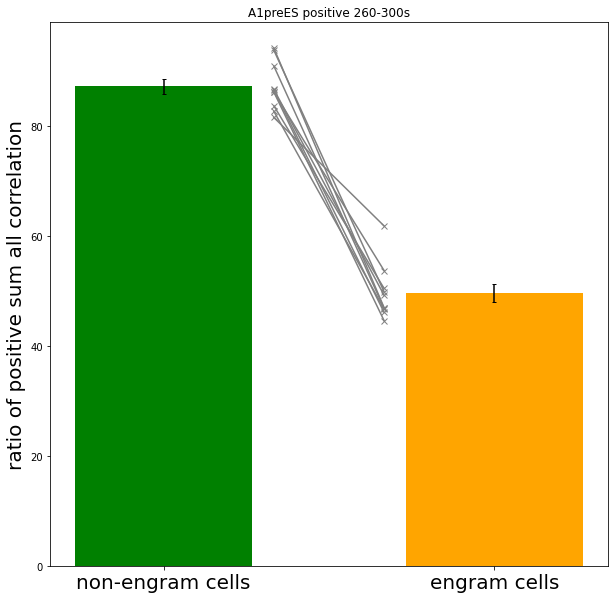

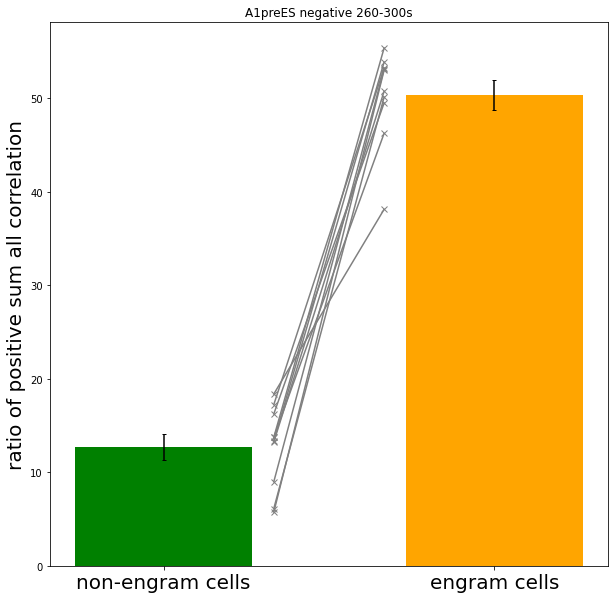

In [8]:
df = means_of_sum_correlation('A1preES', 260, 300)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1preES positive 260-300s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1preES negative 260-300s')
df_per_context['A1preES_260-300'] = df

             engram cells          non-engram cells         
                 positive negative         positive negative
ID181106CreA       54.875   45.125           89.750   10.250
ID181106CreB       45.000   55.000           92.375    7.625
ID181106CreC       44.750   55.250           82.000   18.000
ID181106CreG       55.125   44.875           97.500    2.500
ID181106CreH       55.375   44.625           79.375   20.625
ID181106CreI       68.375   31.625           87.500   12.500
ID181106CreK       57.250   42.750           90.875    9.125
ID181106CreL       54.125   45.875           95.250    4.750
ID181106CreN       49.375   50.625           98.625    1.375
ID181106CreQ       51.750   48.250           97.625    2.375
             engram cells          non-engram cells         
                 positive negative         positive negative
ID181106CreA       51.625   48.375           89.875   10.125
ID181106CreB       48.875   51.125           87.750   12.250
ID181106CreC       44.50

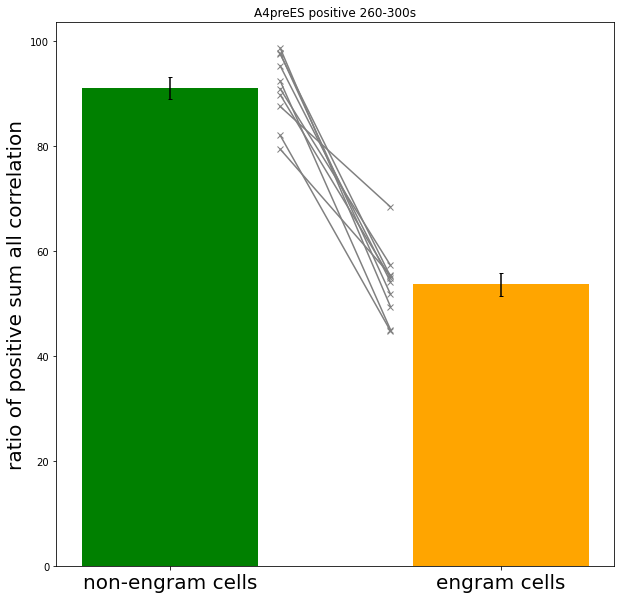

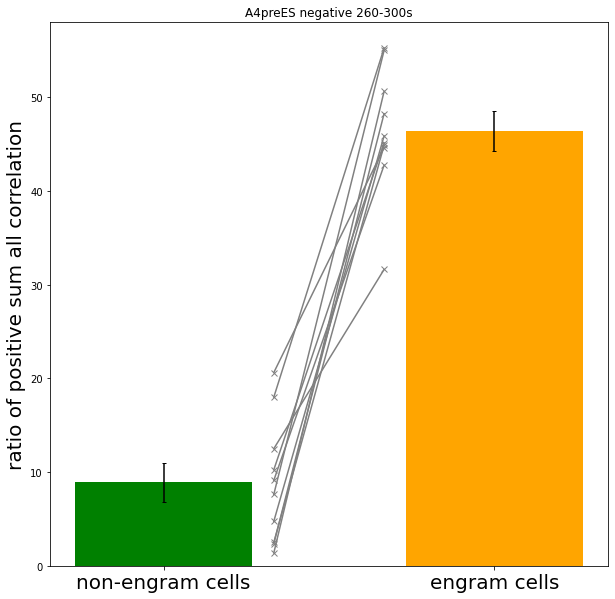

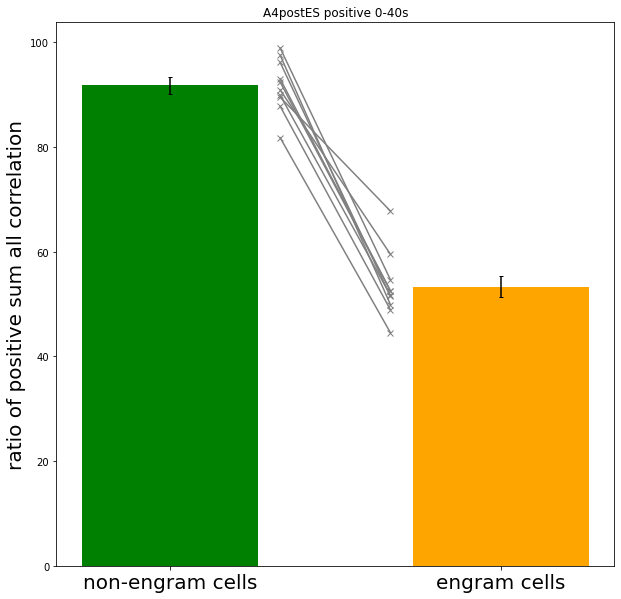

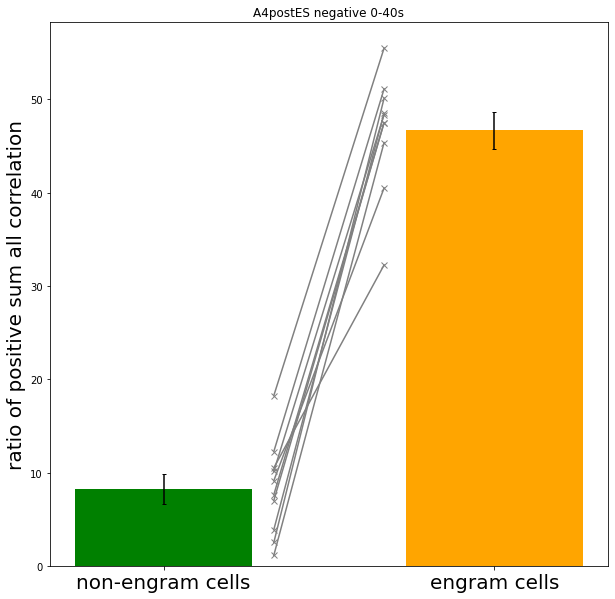

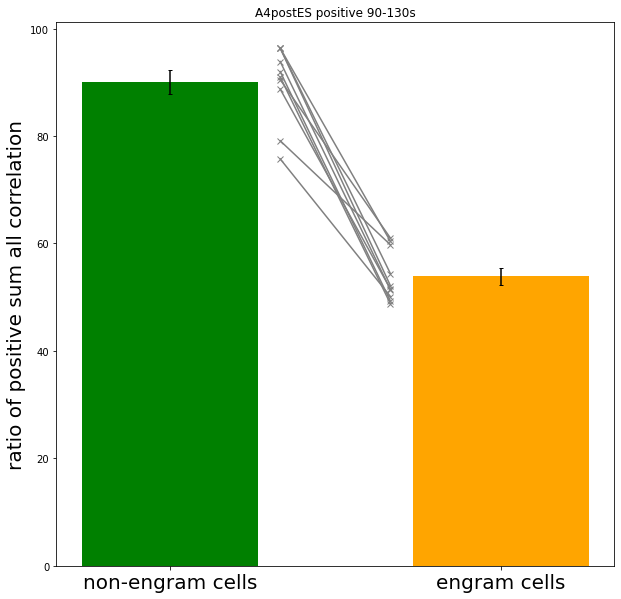

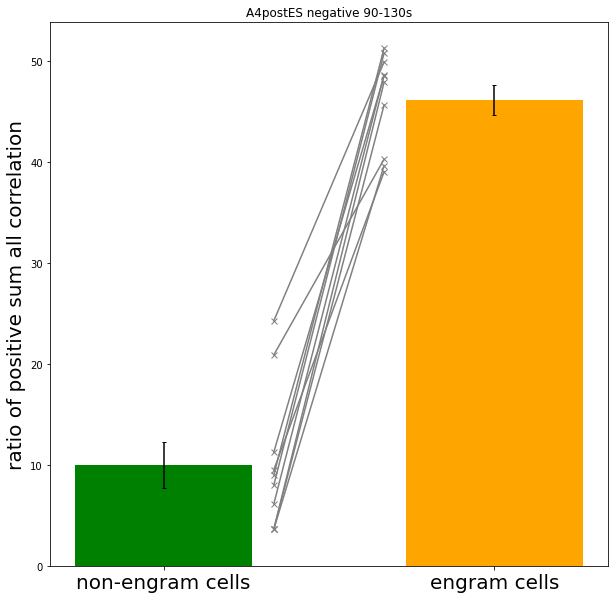

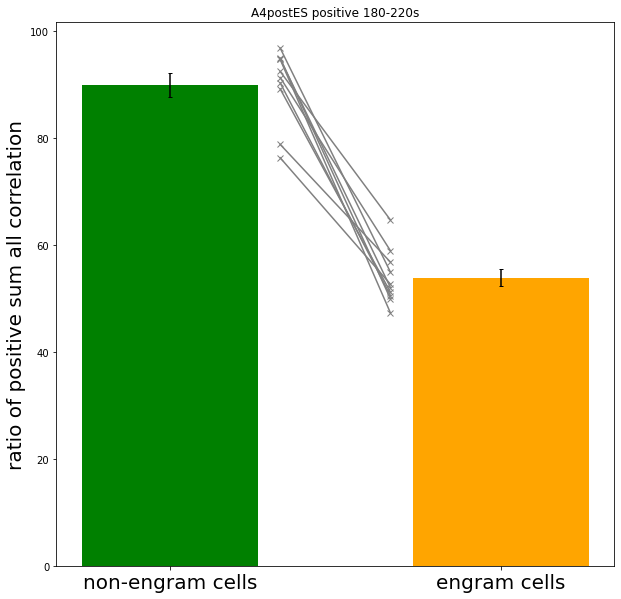

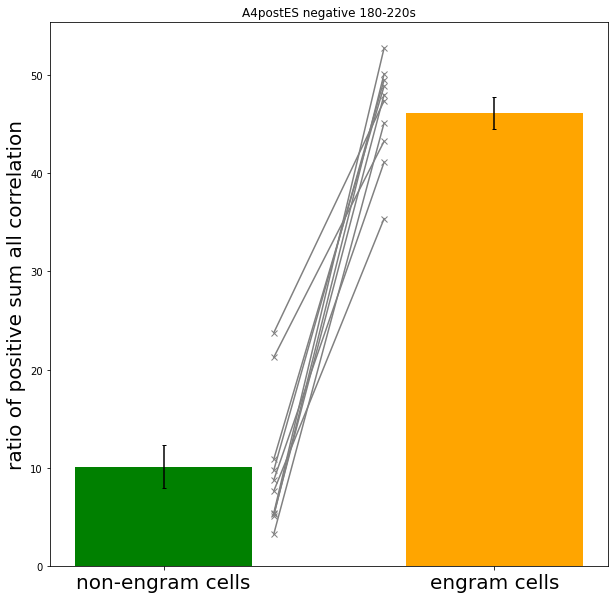

In [9]:
df = means_of_sum_correlation('A4preES', 260, 300)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4preES positive 260-300s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4preES negative 260-300s')
df_per_context['A4preES_260-300'] = df

df = means_of_sum_correlation('A4postES', 0, 40)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4postES positive 0-40s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4postES negative 0-40s')
df_per_context['A4postES_0-40'] = df

df = means_of_sum_correlation('A4postES', 90, 130)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4postES positive 90-130s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4postES negative 90-130s')
df_per_context['A4postES_90-130'] = df

df = means_of_sum_correlation('A4postES', 180, 220)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4postES positive 180-220s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4postES negative 180-220s')
df_per_context['A4postES_180-220'] = df

In [10]:
df_per_context

{'A1postES_0-40':              engram cells          non-engram cells         
                  positive negative         positive negative
 ID181106CreA       43.750   56.250           92.875    7.125
 ID181106CreB       42.375   57.625           85.625   14.375
 ID181106CreC       47.500   52.500           80.875   19.125
 ID181106CreG       56.125   43.875           99.125    0.875
 ID181106CreH       56.750   43.250           91.500    8.500
 ID181106CreI       60.750   39.250           84.875   15.125
 ID181106CreK       60.250   39.750           97.250    2.750
 ID181106CreL       53.500   46.500           94.375    5.625
 ID181106CreN       45.375   54.625           91.875    8.125
 ID181106CreQ       47.750   52.250           91.875    8.125,
 'A1postES_90-130':              engram cells          non-engram cells         
                  positive negative         positive negative
 ID181106CreA       56.125   43.875           95.250    4.750
 ID181106CreB       47.625   52.3

In [11]:
df_index = const.ANIMAL_NAMES
df_columns = ['A1preES_260-300', 'A1postES_0-40', 'A1postES_90-130', 'A1postES_180-220', 'A4preES_260-300', 'A4postES_0-40', 'A4postES_90-130', 'A4postES_180-220']

positive_engram_df = pd.DataFrame(index=df_index, columns=df_columns)
negative_engram_df = pd.DataFrame(index=df_index, columns=df_columns)

for key, df_value in df_per_context.items():
    positive_engram_df.loc[:, key] = df_value.loc[:, ('engram cells', 'positive')]
    negative_engram_df.loc[:, key] = df_value.loc[:, ('engram cells', 'negative')]
    
print(positive_engram_df)
print(negative_engram_df)
#engram_df.to_csv('./sum_correlation_for_engram.csv')

positive_non_engram_df = pd.DataFrame(index=df_index, columns=df_columns)
negative_non_engram_df = pd.DataFrame(index=df_index, columns=df_columns)

for key, df_value in df_per_context.items():
    positive_non_engram_df.loc[:, key] = df_value.loc[:, ('non-engram cells', 'positive')]
    negative_non_engram_df.loc[:, key] = df_value.loc[:, ('non-engram cells', 'negative')]
    
print(positive_non_engram_df)
print(negative_non_engram_df)
#non_engram_df.to_csv('./sum_correlation_for_non_engram.csv')


              A1preES_260-300  A1postES_0-40  A1postES_90-130  \
ID181106CreA           49.250         43.750           56.125   
ID181106CreB           46.750         42.375           47.625   
ID181106CreC           50.500         47.500           46.500   
ID181106CreG           47.000         56.125           52.375   
ID181106CreH           53.750         56.750           50.125   
ID181106CreI           61.875         60.750           75.250   
ID181106CreK           46.875         60.250           53.125   
ID181106CreL           49.875         53.500           47.000   
ID181106CreN           44.625         45.375           43.625   
ID181106CreQ           46.125         47.750           44.750   

              A1postES_180-220  A4preES_260-300  A4postES_0-40  \
ID181106CreA            59.500           54.875         51.625   
ID181106CreB            49.375           45.000         48.875   
ID181106CreC            54.125           44.750         44.500   
ID181106CreG        

<ipython-input-14-f048e693e644>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
<ipython-input-14-f048e693e644>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')


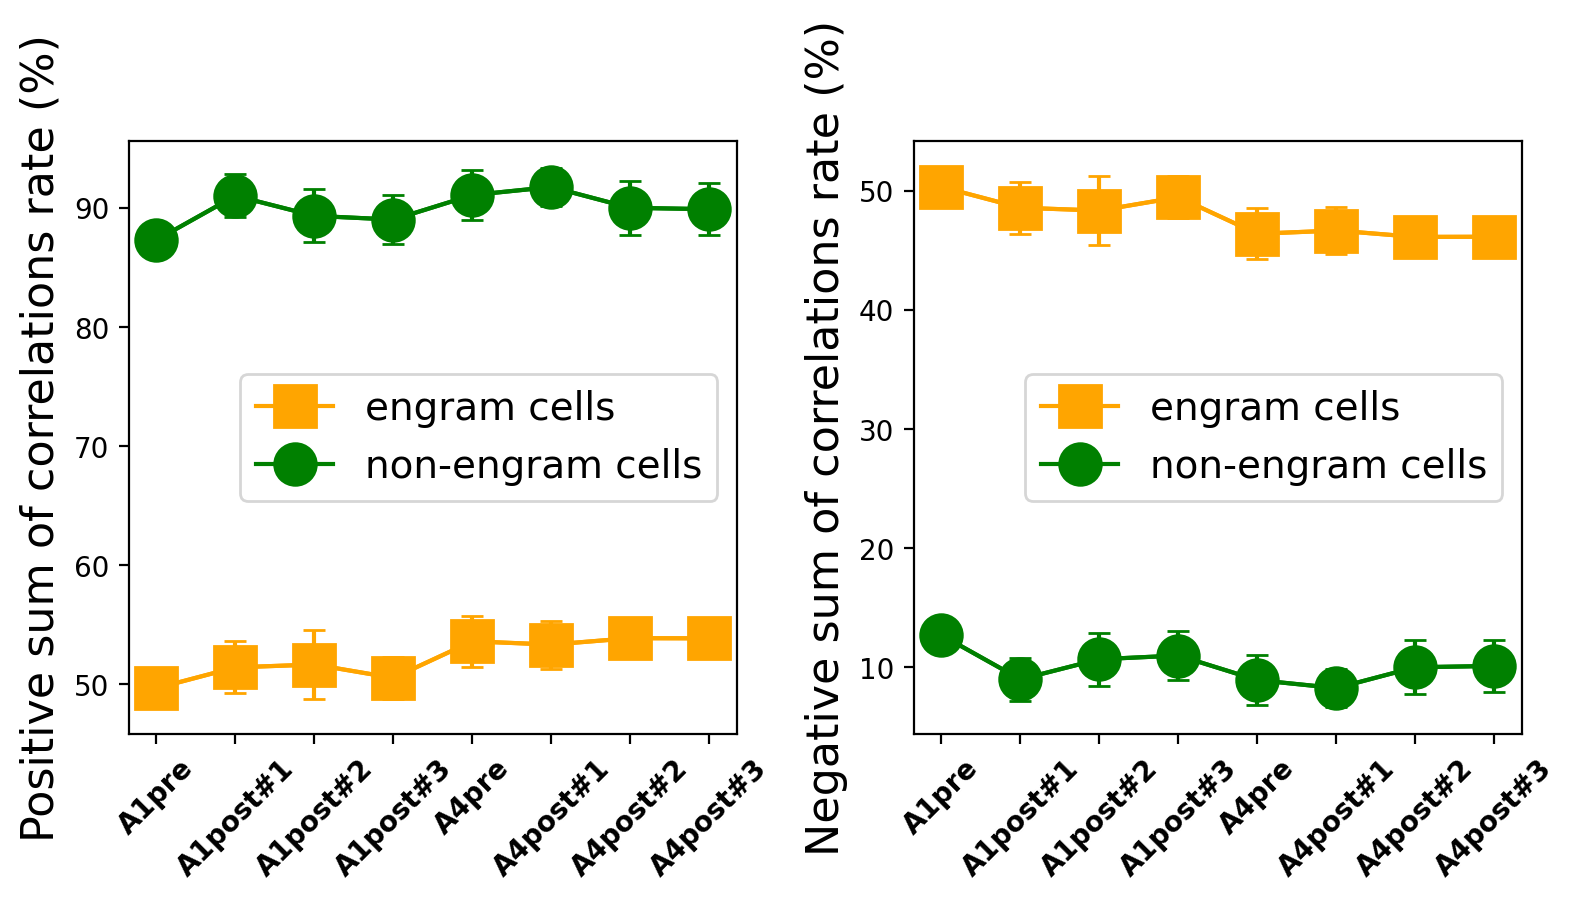

In [14]:
engram_mean = positive_engram_df.mean()
engram_sem = positive_engram_df.sem()
non_engram_mean = positive_non_engram_df.mean()
non_engram_sem = positive_non_engram_df.sem()

negative_engram_mean, negative_engram_sem = negative_engram_df.mean(), negative_engram_df.sem()
negative_non_engram_mean, negative_non_engram_sem = negative_non_engram_df.mean(), negative_non_engram_df.sem()

fig, axes = plt.subplots(ncols=2, figsize=(8, 4), tight_layout=True, dpi=200)

yticks = list(np.arange(0.0, 1.5, 0.10))
axes[0].errorbar(df_columns, engram_mean, yerr=engram_sem, capsize=4, color='orange')
axes[0].plot(df_columns, engram_mean, marker='s', markersize=15, label='engram cells', color='orange')

axes[0].errorbar(df_columns, non_engram_mean, yerr=non_engram_sem, capsize=4, color='green')
axes[0].plot(df_columns, non_engram_mean, marker='o', markersize=15, label='non-engram cells', color='green')

axes[0].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
axes[0].set_ylabel('Positive sum of correlations rate (%)', fontsize=16)
axes[0].legend(fontsize=14)


axes[1].errorbar(df_columns, negative_engram_mean, yerr=negative_engram_sem, capsize=4, color='orange')
axes[1].plot(df_columns, negative_engram_mean, marker='s', markersize=15, label='engram cells', color='orange')

axes[1].errorbar(df_columns, negative_non_engram_mean, yerr=negative_non_engram_sem, capsize=4, color='green')
axes[1].plot(df_columns, negative_non_engram_mean, marker='o', markersize=15, label='non-engram cells', color='green')

axes[1].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
axes[1].set_ylabel('Negative sum of correlations rate (%)', fontsize=16)
axes[1].legend(fontsize=14)

fig.show()

In [13]:
_, pvalue = wilcoxon(engram_df.loc[:, 'A1preES_260-300'], engram_df.loc[:, 'A1postES_0-40'])
pvalue

NameError: name 'engram_df' is not defined